In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('immo_data_202208_v2.csv', low_memory=False)
df_origin = df.copy()

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,0,0,Biberstein,100 m²,NaN,NaN,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
1,1,1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
2,2,2,NaN,NaN,NaN,NaN,NaN,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
3,3,3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
4,4,4,Küttigen,142 m²,NaN,NaN,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN


In [4]:
df.drop(df.columns[:2], axis=1, inplace=True)

In [5]:
df.head()

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,Biberstein,100 m²,NaN,NaN,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
4,Küttigen,142 m²,NaN,NaN,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,https://www.immoscout24.ch//en/d/flat-buy-romb...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,lat,lon,index,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,...,Plot_area_unified,Living_area_unified,No. of rooms:,Number of apartments:,Last refurbishment:,Year built:,Number of floors:,plz,Number of toilets:,space_cleaned
count,22464.000000,22464.000000,22481.000000,22481.000000,22481.000000,22481.000000,22481.000000,22481.000000,22481.000000,22481.000000,...,7953.000000,20979.000000,8868.000000,904.000000,2257.000000,6933.000000,2399.000000,22464.000000,73.0,9126.000000
mean,46.635880,7.574546,29347.422045,0.188333,0.124134,0.079028,46.636486,7.575568,0.013129,0.012675,...,1381.212121,160.777253,5.039693,5.495575,2013.533895,1987.161114,2.702793,3686.224849,1.0,164.077800
std,0.494437,0.912712,25374.526109,0.200194,0.179710,0.163772,0.494628,0.912848,0.025646,0.032863,...,6704.901382,136.126762,2.508945,17.790337,9.310723,58.214760,1.441823,2465.518124,0.0,159.628126
min,45.825344,5.970274,2.000000,0.000000,0.000000,0.000000,45.826553,5.971354,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1930.000000,1400.000000,1.000000,397.000000,1.0,1.000000
25%,46.226208,6.929264,12716.000000,0.023758,0.000000,0.000000,46.224047,6.929208,0.000000,0.000000,...,347.000000,96.000000,3.500000,1.000000,2010.000000,1975.000000,2.000000,1800.000000,1.0,93.000000
50%,46.497972,7.357070,12716.000000,0.114693,0.030199,0.000000,46.496443,7.357162,0.000000,0.000000,...,645.000000,130.000000,4.500000,2.000000,2016.000000,2009.000000,3.000000,2542.000000,1.0,127.500000
75%,47.054821,8.287937,45795.000000,0.296525,0.190419,0.050985,47.056408,8.292168,0.015243,0.000386,...,1141.000000,181.000000,5.500000,6.000000,2020.000000,2022.000000,3.000000,5736.000000,1.0,184.000000
max,47.792463,10.399094,84754.000000,0.896966,0.999453,1.000000,47.791953,10.396715,0.258665,0.391704,...,350917.000000,4362.000000,35.000000,502.000000,2025.000000,2025.000000,18.000000,9658.000000,1.0,4362.000000


In [7]:
df

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,Biberstein,100 m²,NaN,NaN,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
4,Küttigen,142 m²,NaN,NaN,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,https://www.immoscout24.ch//en/d/flat-buy-romb...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,Buchs SG,NaN,NaN,NaN,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",https://www.homegate.ch/buy/3002006758,NaN,...,Pets allowed\tCable TV\tChild-friendly\tParkin...,"Description\n""Hausteil mit verschieden Nutzung...",NaN,NaN,496 m3,9470.0,NaN,NaN,NaN,102.0
22477,Wil,NaN,NaN,NaN,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",https://www.homegate.ch/buy/3001826476,NaN,...,Balcony / Terrace\tWashing machine\tView\tWhee...,"Description\n""J'ADORE - Exklusives Wohnen in W...",NaN,3.0,NaN,9500.0,NaN,NaN,NaN,180.0
22478,Wil SG,NaN,NaN,NaN,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",https://www.homegate.ch/buy/3001908610,NaN,...,Balcony / Terrace\tChild-friendly\tParking space,"Description\n""Einmalige Gelegenheit an sehr gu...",NaN,3.0,706 m3,9500.0,NaN,NaN,NaN,167.0
22479,Matzingen,NaN,NaN,NaN,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",https://www.homegate.ch/buy/3001883386,NaN,...,Balcony / Terrace\tView\tWheelchair access\tQu...,"Description\n""LA VIE - Exklusives Wohnen in Ma...",NaN,NaN,NaN,9548.0,NaN,NaN,NaN,175.0


In [8]:
nan_count_per_columns = df.isna().sum()
nan_count_per_row = df.isna().sum(axis=1)

In [9]:
print(nan_count_per_columns)

Municipality              931
Living space            10868
Plot area               17797
Floor space             19706
Availability             9840
                        ...  
plz                        17
Number of toilets:      22408
Gross yield:            22467
Minimum floor space:    22479
space_cleaned           13355
Length: 132, dtype: int64


In [10]:
print(nan_count_per_row)

0        50
1        48
2        57
3        48
4        50
         ..
22476    50
22477    55
22478    50
22479    56
22480    52
Length: 22481, dtype: int64


In [11]:
df_plz = pd.read_excel('Postleitzahlen-Schweiz.xlsx')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [12]:
df_plz

,Postleitzahl / Code Postal / Codice Postale,Ort / Ville / Città,Kanton,Canton,Cantone,Abkürzung / Abréviation / Abbreviazione,Land,Pays,Paese
0,1000,Lausanne,Waadt,Vaud,Vaud,VD,Schweiz,Suisse,Svizzera
1,1003,Lausanne,Waadt,Vaud,Vaud,VD,Schweiz,Suisse,Svizzera
2,1004,Lausanne,Waadt,Vaud,Vaud,VD,Schweiz,Suisse,Svizzera
3,1005,Lausanne,Waadt,Vaud,Vaud,VD,Schweiz,Suisse,Svizzera
4,1006,Lausanne,Waadt,Vaud,Vaud,VD,Schweiz,Suisse,Svizzera
...,...,...,...,...,...,...,...,...,...
4115,9652,Neu St. Johann,St. Gallen,Saint-Gall,San Gallo,SG,Schweiz,Suisse,Svizzera
4116,9655,Stein SG,St. Gallen,Saint-Gall,San Gallo,SG,Schweiz,Suisse,Svizzera
4117,9656,Alt St. Johann,St. Gallen,Saint-Gall,San Gallo,SG,Schweiz,Suisse,Svizzera
4118,9657,Unterwasser,St. Gallen,Saint-Gall,San Gallo,SG,Schweiz,Suisse,Svizzera


In [13]:
plz_columns_to_remove = ['Canton', 'Cantone', 'Pays', 'Paese']
df_plz = df_plz.drop(columns=plz_columns_to_remove)

In [14]:
df_plz

,Postleitzahl / Code Postal / Codice Postale,Ort / Ville / Città,Kanton,Abkürzung / Abréviation / Abbreviazione,Land
0,1000,Lausanne,Waadt,VD,Schweiz
1,1003,Lausanne,Waadt,VD,Schweiz
2,1004,Lausanne,Waadt,VD,Schweiz
3,1005,Lausanne,Waadt,VD,Schweiz
4,1006,Lausanne,Waadt,VD,Schweiz
...,...,...,...,...,...
4115,9652,Neu St. Johann,St. Gallen,SG,Schweiz
4116,9655,Stein SG,St. Gallen,SG,Schweiz
4117,9656,Alt St. Johann,St. Gallen,SG,Schweiz
4118,9657,Unterwasser,St. Gallen,SG,Schweiz


In [15]:
df_plz.rename(columns={'Postleitzahl / Code Postal / Codice Postale': 'plz', 'Ort / Ville / Città': 'Ort', 'Abkürzung / Abréviation / Abbreviazione': 'Abkürzung'}, inplace=True)

In [16]:
df_plz
df_plz.to_csv('plz.csv')

In [17]:
df

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,Biberstein,100 m²,NaN,NaN,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
4,Küttigen,142 m²,NaN,NaN,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,https://www.immoscout24.ch//en/d/flat-buy-romb...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,Buchs SG,NaN,NaN,NaN,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",https://www.homegate.ch/buy/3002006758,NaN,...,Pets allowed\tCable TV\tChild-friendly\tParkin...,"Description\n""Hausteil mit verschieden Nutzung...",NaN,NaN,496 m3,9470.0,NaN,NaN,NaN,102.0
22477,Wil,NaN,NaN,NaN,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",https://www.homegate.ch/buy/3001826476,NaN,...,Balcony / Terrace\tWashing machine\tView\tWhee...,"Description\n""J'ADORE - Exklusives Wohnen in W...",NaN,3.0,NaN,9500.0,NaN,NaN,NaN,180.0
22478,Wil SG,NaN,NaN,NaN,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",https://www.homegate.ch/buy/3001908610,NaN,...,Balcony / Terrace\tChild-friendly\tParking space,"Description\n""Einmalige Gelegenheit an sehr gu...",NaN,3.0,706 m3,9500.0,NaN,NaN,NaN,167.0
22479,Matzingen,NaN,NaN,NaN,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",https://www.homegate.ch/buy/3001883386,NaN,...,Balcony / Terrace\tView\tWheelchair access\tQu...,"Description\n""LA VIE - Exklusives Wohnen in Ma...",NaN,NaN,NaN,9548.0,NaN,NaN,NaN,175.0


In [18]:
# Funktion zum Zuordnen der 'Ort'-Werte basierend auf 'plz'
def map_ort(plz):
    matching_rows = df_plz[df_plz['plz'] == plz]
    if not matching_rows.empty:
        return matching_rows.iloc[0]['Ort']
    else:
        return None

In [19]:
# Fehlende Werte in 'Municipality' füllen
df['Municipality'] = df['plz'].apply(map_ort)

In [20]:
df

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,Biberstein,100 m²,NaN,NaN,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
2,Rombach,NaN,NaN,NaN,NaN,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
4,Rombach,142 m²,NaN,NaN,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,https://www.immoscout24.ch//en/d/flat-buy-romb...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,Buchs SG,NaN,NaN,NaN,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",https://www.homegate.ch/buy/3002006758,NaN,...,Pets allowed\tCable TV\tChild-friendly\tParkin...,"Description\n""Hausteil mit verschieden Nutzung...",NaN,NaN,496 m3,9470.0,NaN,NaN,NaN,102.0
22477,Wil SG,NaN,NaN,NaN,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",https://www.homegate.ch/buy/3001826476,NaN,...,Balcony / Terrace\tWashing machine\tView\tWhee...,"Description\n""J'ADORE - Exklusives Wohnen in W...",NaN,3.0,NaN,9500.0,NaN,NaN,NaN,180.0
22478,Wil SG,NaN,NaN,NaN,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",https://www.homegate.ch/buy/3001908610,NaN,...,Balcony / Terrace\tChild-friendly\tParking space,"Description\n""Einmalige Gelegenheit an sehr gu...",NaN,3.0,706 m3,9500.0,NaN,NaN,NaN,167.0
22479,Matzingen,NaN,NaN,NaN,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",https://www.homegate.ch/buy/3001883386,NaN,...,Balcony / Terrace\tView\tWheelchair access\tQu...,"Description\n""LA VIE - Exklusives Wohnen in Ma...",NaN,NaN,NaN,9548.0,NaN,NaN,NaN,175.0


In [21]:
missing_values_count = df_origin['Municipality'].isna().sum()
print('Values missing old DF: ', missing_values_count)

Values missing old DF:  931


In [22]:
missing_values_new = df['Municipality'].isna().sum()
print('Values missing new DF: ', missing_values_new)

Values missing new DF:  18


In [23]:
# Zeilen anzeigen, in denen die 'Municipality'-Spalte fehlende Werte enthält
missing_rows = df[df['Municipality'].isna()]
missing_rows

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
3851,None,77 m²,NaN,NaN,Immediately,SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...,"3.5 rooms, 77 m²«Offre de vente T2 - Le Castel...","DescriptionDans un écrin de verdure, l apparte...",https://www.immoscout24.ch//en/d/flat-buy-troi...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4073,None,NaN,2919 m²,NaN,On request,"7514 Sils/Segl Maria, GR",«VERSTECKT»Price on requestFavourite,Descriptionwww.LifestyleHomes.chIn Sils im Eng...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4074,None,288 m²,252 m²,205 m²,On request,"7514 Sils/Segl Maria, GR","12 rooms, 288 m²«Altrechtliche Liegenschaft mi...",DescriptionBei dieser Liegenschaft handelt es ...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4075,None,411 m²,558 m²,428 m²,On request,"7514 Sils/Segl Maria, GR",411 m²«Vier Wände - tausend Möglichkeiten!»Pri...,DescriptionDiese freistehende Traumimmobilie b...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4203,None,138 m²,NaN,NaN,On request,"Via Brutg 237032 Laax GR 2, GR","4.5 rooms, 138 m²«4.5-Zi. MAISSEN-Maisonette-W...",DescriptionAllgemeiner Beschrieb Ihr neuer ER...,https://www.immoscout24.ch//en/d/flat-buy-laax...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4206,None,138 m²,NaN,NaN,On request,"Via Brutg 237032 Laax GR 2, GR","4.5 rooms, 138 m²«4.5-Zi. MAISSEN-Maisonette-W...",DescriptionAllgemeiner Beschrieb Ihr neuer ER...,https://www.immoscout24.ch//en/d/flat-buy-laax...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4209,None,74 m²,NaN,74 m²,Immediately,"Via Cuolm Liung 307032 Laax GR 2, GR","2.5 rooms, 74 m²«Ski in – Ski out in LAAX»CHF ...",DescriptionDie Top-Destination Flims Laax Fale...,https://www.immoscout24.ch//en/d/flat-buy-laax...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,None,42 m²,NaN,NaN,Immediately,"7032 Laax GR 2, GR","1.5 rooms, 42 m²«Ski in/Ski out direkt an der ...",DescriptionDas 42 m² grosse Studio befindet si...,https://www.immoscout24.ch//en/d/flat-buy-laax...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10211,None,104 m²,NaN,113 m²,On request,"1000 Lausanne 26, VD","4.5 rooms, 104 m²«Charmant appartement familia...",DescriptionVERS-CHEZ-LES-BLANC - Maillard Immo...,https://www.immoscout24.ch//en/d/flat-buy-laus...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10214,None,104 m²,NaN,110 m²,On request,"1000 Lausanne 26, VD","4.5 rooms, 104 m²«Charmant rez-jardin dans les...",DescriptionVERS-CHEZ-LES-BLANC - Maillard Immo...,https://www.immoscout24.ch//en/d/flat-buy-laus...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.iloc[3851]

Municipality                   None
Living space                  77 m²
Plot area                       NaN
Floor space                     NaN
Availability            Immediately
                           ...     
plz                             NaN
Number of toilets:              NaN
Gross yield:                    NaN
Minimum floor space:            NaN
space_cleaned                   NaN
Name: 3851, Length: 132, dtype: object

In [25]:
df['Municipality'].fillna(df['Municipality_merged'].map(df_plz.set_index('Ort')['plz'].to_dict()), inplace=True)

In [26]:
df.iloc[3851]

Municipality                 1256.0
Living space                  77 m²
Plot area                       NaN
Floor space                     NaN
Availability            Immediately
                           ...     
plz                             NaN
Number of toilets:              NaN
Gross yield:                    NaN
Minimum floor space:            NaN
space_cleaned                   NaN
Name: 3851, Length: 132, dtype: object

In [27]:
df

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,Biberstein,100 m²,NaN,NaN,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
2,Rombach,NaN,NaN,NaN,NaN,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
4,Rombach,142 m²,NaN,NaN,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,https://www.immoscout24.ch//en/d/flat-buy-romb...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,Buchs SG,NaN,NaN,NaN,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",https://www.homegate.ch/buy/3002006758,NaN,...,Pets allowed\tCable TV\tChild-friendly\tParkin...,"Description\n""Hausteil mit verschieden Nutzung...",NaN,NaN,496 m3,9470.0,NaN,NaN,NaN,102.0
22477,Wil SG,NaN,NaN,NaN,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",https://www.homegate.ch/buy/3001826476,NaN,...,Balcony / Terrace\tWashing machine\tView\tWhee...,"Description\n""J'ADORE - Exklusives Wohnen in W...",NaN,3.0,NaN,9500.0,NaN,NaN,NaN,180.0
22478,Wil SG,NaN,NaN,NaN,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",https://www.homegate.ch/buy/3001908610,NaN,...,Balcony / Terrace\tChild-friendly\tParking space,"Description\n""Einmalige Gelegenheit an sehr gu...",NaN,3.0,706 m3,9500.0,NaN,NaN,NaN,167.0
22479,Matzingen,NaN,NaN,NaN,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",https://www.homegate.ch/buy/3001883386,NaN,...,Balcony / Terrace\tView\tWheelchair access\tQu...,"Description\n""LA VIE - Exklusives Wohnen in Ma...",NaN,NaN,NaN,9548.0,NaN,NaN,NaN,175.0


In [28]:
def count_missing_values(df):
    # Zähle die fehlenden Werte spaltenweise
    missing_values_count = df.isnull().sum()

    # Zeige die Anzahl der fehlenden Werte pro Spalte an
    print("Anzahl der fehlenden Werte pro Spalte:")
    print(missing_values_count)

In [29]:
count_missing_values(df)

Anzahl der fehlenden Werte pro Spalte:
Municipality                7
Living space            10868
Plot area               17797
Floor space             19706
Availability             9840
                        ...  
plz                        17
Number of toilets:      22408
Gross yield:            22467
Minimum floor space:    22479
space_cleaned           13355
Length: 132, dtype: int64


In [30]:
missing_rows = df[df['Municipality'].isna()]
missing_rows

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
4073,NaN,NaN,2919 m²,NaN,On request,"7514 Sils/Segl Maria, GR",«VERSTECKT»Price on requestFavourite,Descriptionwww.LifestyleHomes.chIn Sils im Eng...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4074,NaN,288 m²,252 m²,205 m²,On request,"7514 Sils/Segl Maria, GR","12 rooms, 288 m²«Altrechtliche Liegenschaft mi...",DescriptionBei dieser Liegenschaft handelt es ...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4075,NaN,411 m²,558 m²,428 m²,On request,"7514 Sils/Segl Maria, GR",411 m²«Vier Wände - tausend Möglichkeiten!»Pri...,DescriptionDiese freistehende Traumimmobilie b...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4203,NaN,138 m²,NaN,NaN,On request,"Via Brutg 237032 Laax GR 2, GR","4.5 rooms, 138 m²«4.5-Zi. MAISSEN-Maisonette-W...",DescriptionAllgemeiner Beschrieb Ihr neuer ER...,https://www.immoscout24.ch//en/d/flat-buy-laax...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4206,NaN,138 m²,NaN,NaN,On request,"Via Brutg 237032 Laax GR 2, GR","4.5 rooms, 138 m²«4.5-Zi. MAISSEN-Maisonette-W...",DescriptionAllgemeiner Beschrieb Ihr neuer ER...,https://www.immoscout24.ch//en/d/flat-buy-laax...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4209,NaN,74 m²,NaN,74 m²,Immediately,"Via Cuolm Liung 307032 Laax GR 2, GR","2.5 rooms, 74 m²«Ski in – Ski out in LAAX»CHF ...",DescriptionDie Top-Destination Flims Laax Fale...,https://www.immoscout24.ch//en/d/flat-buy-laax...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,NaN,42 m²,NaN,NaN,Immediately,"7032 Laax GR 2, GR","1.5 rooms, 42 m²«Ski in/Ski out direkt an der ...",DescriptionDas 42 m² grosse Studio befindet si...,https://www.immoscout24.ch//en/d/flat-buy-laax...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
missing_rows = df[df['details_structured'].isna()]
missing_rows

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
13355,Lausanne,NaN,NaN,NaN,NaN,1000 Lausanne 26,"Cette maison, construite en 1914, est située d...","Description\n""Maison de maître composée de 3 a...",https://www.homegate.ch/buy/3001940600,NaN,...,Balcony / Terrace\tCable TV\tChild-friendly\tG...,"Description\n""Maison de maître composée de 3 a...",NaN,NaN,NaN,1000.0,NaN,NaN,NaN,275.0
13356,Lausanne,NaN,NaN,NaN,NaN,1004 Lausanne,"PROXIMMO, VOTRE AGENCE IMMOBILIÈRE À LAUSANNE ...","Description\n""A SAISIR ! EMPLACEMENT IDÉAL EN ...",https://www.homegate.ch/buy/3002011460,NaN,...,Balcony / Terrace\tGarage\tElevator,"Description\n""A SAISIR ! EMPLACEMENT IDÉAL EN ...",106 m2,NaN,NaN,1004.0,NaN,NaN,NaN,106.0
13357,Lausanne,NaN,NaN,NaN,NaN,1004 Lausanne,"Situé au coeur de Lausanne, dans un quartier p...","Description\n""VISITE VIRTUELLE : Exclusif au c...",https://www.homegate.ch/buy/3002038888,NaN,...,Child-friendly\tParking space\tElevator\tNew b...,"Description\n""VISITE VIRTUELLE : Exclusif au c...",NaN,NaN,NaN,1004.0,NaN,NaN,NaN,100.0
13358,Lausanne,NaN,NaN,NaN,NaN,1018 Lausanne,"Charmant appartement de 2,5 pièces avec un jol...","Description\n""Charmant appartement - joli pote...",https://www.homegate.ch/buy/3001985353,NaN,...,Garage,"Description\n""Charmant appartement - joli pote...",52 m2,NaN,NaN,1018.0,NaN,NaN,NaN,52.0
13359,Lausanne,NaN,NaN,NaN,NaN,1018 Lausanne,"Joli appartement de 3.5 pièces, d'une surface ...","Description\n""3.5 pièces au 2ème étage""\nJoli ...",https://www.homegate.ch/buy/3001793162,NaN,...,Balcony / Terrace,"Description\n""3.5 pièces au 2ème étage""\nJoli ...",NaN,1.0,NaN,1018.0,NaN,NaN,NaN,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,Buchs SG,NaN,NaN,NaN,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",https://www.homegate.ch/buy/3002006758,NaN,...,Pets allowed\tCable TV\tChild-friendly\tParkin...,"Description\n""Hausteil mit verschieden Nutzung...",NaN,NaN,496 m3,9470.0,NaN,NaN,NaN,102.0
22477,Wil SG,NaN,NaN,NaN,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",https://www.homegate.ch/buy/3001826476,NaN,...,Balcony / Terrace\tWashing machine\tView\tWhee...,"Description\n""J'ADORE - Exklusives Wohnen in W...",NaN,3.0,NaN,9500.0,NaN,NaN,NaN,180.0
22478,Wil SG,NaN,NaN,NaN,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",https://www.homegate.ch/buy/3001908610,NaN,...,Balcony / Terrace\tChild-friendly\tParking space,"Description\n""Einmalige Gelegenheit an sehr gu...",NaN,3.0,706 m3,9500.0,NaN,NaN,NaN,167.0
22479,Matzingen,NaN,NaN,NaN,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",https://www.homegate.ch/buy/3001883386,NaN,...,Balcony / Terrace\tView\tWheelchair access\tQu...,"Description\n""LA VIE - Exklusives Wohnen in Ma...",NaN,NaN,NaN,9548.0,NaN,NaN,NaN,175.0


In [32]:
# Funktion zum Extrahieren des 'location'-Werts aus dem Dictionary
def extract_location(row):
    details = ast.literal_eval(row)  # Das Dictionary aus dem String extrahieren
    return details.get('location', None)

In [33]:
df_test = df.copy()

In [34]:
# Funktion zum Kopieren von 'Floor space:' zu 'Floor space'
def copy_floor_space(row):
    if pd.notna(row['Floor space']):
        return row['Floor space']
    elif pd.notna(row['Floor space:']):
        return row['Floor space:']
    else:
        return None

In [35]:
df

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,Biberstein,100 m²,NaN,NaN,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
2,Rombach,NaN,NaN,NaN,NaN,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
4,Rombach,142 m²,NaN,NaN,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,https://www.immoscout24.ch//en/d/flat-buy-romb...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,Buchs SG,NaN,NaN,NaN,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",https://www.homegate.ch/buy/3002006758,NaN,...,Pets allowed\tCable TV\tChild-friendly\tParkin...,"Description\n""Hausteil mit verschieden Nutzung...",NaN,NaN,496 m3,9470.0,NaN,NaN,NaN,102.0
22477,Wil SG,NaN,NaN,NaN,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",https://www.homegate.ch/buy/3001826476,NaN,...,Balcony / Terrace\tWashing machine\tView\tWhee...,"Description\n""J'ADORE - Exklusives Wohnen in W...",NaN,3.0,NaN,9500.0,NaN,NaN,NaN,180.0
22478,Wil SG,NaN,NaN,NaN,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",https://www.homegate.ch/buy/3001908610,NaN,...,Balcony / Terrace\tChild-friendly\tParking space,"Description\n""Einmalige Gelegenheit an sehr gu...",NaN,3.0,706 m3,9500.0,NaN,NaN,NaN,167.0
22479,Matzingen,NaN,NaN,NaN,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",https://www.homegate.ch/buy/3001883386,NaN,...,Balcony / Terrace\tView\tWheelchair access\tQu...,"Description\n""LA VIE - Exklusives Wohnen in Ma...",NaN,NaN,NaN,9548.0,NaN,NaN,NaN,175.0


In [36]:
missing_values_new = df['Floor space'].isna().sum()
print('Values missing new DF: ', missing_values_new)

Values missing new DF:  19706


In [37]:
df['Floor space'] = df.apply(copy_floor_space, axis=1)

In [38]:
df

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,Biberstein,100 m²,NaN,None,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
2,Rombach,NaN,NaN,None,NaN,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
4,Rombach,142 m²,NaN,None,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,https://www.immoscout24.ch//en/d/flat-buy-romb...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,Buchs SG,NaN,NaN,None,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",https://www.homegate.ch/buy/3002006758,NaN,...,Pets allowed\tCable TV\tChild-friendly\tParkin...,"Description\n""Hausteil mit verschieden Nutzung...",NaN,NaN,496 m3,9470.0,NaN,NaN,NaN,102.0
22477,Wil SG,NaN,NaN,None,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",https://www.homegate.ch/buy/3001826476,NaN,...,Balcony / Terrace\tWashing machine\tView\tWhee...,"Description\n""J'ADORE - Exklusives Wohnen in W...",NaN,3.0,NaN,9500.0,NaN,NaN,NaN,180.0
22478,Wil SG,NaN,NaN,None,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",https://www.homegate.ch/buy/3001908610,NaN,...,Balcony / Terrace\tChild-friendly\tParking space,"Description\n""Einmalige Gelegenheit an sehr gu...",NaN,3.0,706 m3,9500.0,NaN,NaN,NaN,167.0
22479,Matzingen,NaN,NaN,None,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",https://www.homegate.ch/buy/3001883386,NaN,...,Balcony / Terrace\tView\tWheelchair access\tQu...,"Description\n""LA VIE - Exklusives Wohnen in Ma...",NaN,NaN,NaN,9548.0,NaN,NaN,NaN,175.0


In [39]:
missing_values_new = df['Floor space'].isna().sum()
print('Values missing new DF: ', missing_values_new)

Values missing new DF:  16946


In [40]:
print(df['Floor space:'].count())

2760


In [41]:
missing_values_new = df['Municipality'].isna().sum()
print('Values missing new DF Municipality: ', missing_values_new)

missing_values_new = df['Living space'].isna().sum()
print('Values missing new DF Living Space: ', missing_values_new)

missing_values_new = df['Floor'].isna().sum()
print('Values missing new DF Floor: ', missing_values_new)

missing_values_new = df['Availability'].isna().sum()
print('Values missing new DF Availability: ', missing_values_new)

Values missing new DF Municipality:  7
Values missing new DF Living Space:  10868
Values missing new DF Floor:  12530
Values missing new DF Availability:  9840


In [42]:
# Funktion zum Auffüllen der Spalten mit Daten aus 'details_structured'
def fill_columns(row):
    details = ast.literal_eval(row['details_structured']) if pd.notna(row['details_structured']) else {}
    mapping = {
        'Gemeinde': 'Municipality',
        'Wohnfläche': 'Living space',
        #'Etage': 'Floor',
        'Verfügbarkeit': 'Availability',
        'detail_responsive#municipality': 'Municipality',
        'detail_responsive#surface_living': 'Living space',
        'detail_responsive#floor': 'Floor',
        'detail_responsive#available_from': 'Availability'
    }
    for col in df.columns:
        if pd.isna(row[col]) and col in mapping:
            if mapping[col] in details:
                row[col] = details[mapping[col]]
    return row

In [43]:
df = df.apply(fill_columns, axis=1)

In [44]:
missing_values_new = df['Municipality'].isna().sum()
print('Values missing new DF Municipality: ', missing_values_new)

missing_values_new = df['Living space'].isna().sum()
print('Values missing new DF Living Space: ', missing_values_new)

missing_values_new = df['Floor'].isna().sum()
print('Values missing new DF Floor: ', missing_values_new)

missing_values_new = df['Availability'].isna().sum()
print('Values missing new DF Availability: ', missing_values_new)

Values missing new DF Municipality:  7
Values missing new DF Living Space:  10868
Values missing new DF Floor:  12530
Values missing new DF Availability:  9840


In [45]:
df

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,Biberstein,100 m²,NaN,None,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
2,Rombach,NaN,NaN,None,NaN,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
4,Rombach,142 m²,NaN,None,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,https://www.immoscout24.ch//en/d/flat-buy-romb...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,Buchs SG,NaN,NaN,None,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",https://www.homegate.ch/buy/3002006758,NaN,...,Pets allowed\tCable TV\tChild-friendly\tParkin...,"Description\n""Hausteil mit verschieden Nutzung...",NaN,NaN,496 m3,9470.0,NaN,NaN,NaN,102.0
22477,Wil SG,NaN,NaN,None,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",https://www.homegate.ch/buy/3001826476,NaN,...,Balcony / Terrace\tWashing machine\tView\tWhee...,"Description\n""J'ADORE - Exklusives Wohnen in W...",NaN,3.0,NaN,9500.0,NaN,NaN,NaN,180.0
22478,Wil SG,NaN,NaN,None,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",https://www.homegate.ch/buy/3001908610,NaN,...,Balcony / Terrace\tChild-friendly\tParking space,"Description\n""Einmalige Gelegenheit an sehr gu...",NaN,3.0,706 m3,9500.0,NaN,NaN,NaN,167.0
22479,Matzingen,NaN,NaN,None,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",https://www.homegate.ch/buy/3001883386,NaN,...,Balcony / Terrace\tView\tWheelchair access\tQu...,"Description\n""LA VIE - Exklusives Wohnen in Ma...",NaN,NaN,NaN,9548.0,NaN,NaN,NaN,175.0


In [46]:
missing_values_new = df['Living space'].isna().sum()
print('Values missing new DF Living Space: ', missing_values_new)

Values missing new DF Living Space:  10868


In [47]:
# Hauptspalte 'Living space' zusammenführen
def merge_columns_living_space(row):
    if pd.isna(row['Living space']):
        for col in ['detail_responsive#surface_living', 'Wohnfläche', 'Surface habitable', 'Superficie abitabile', 'Living_space_merged', 'Surface living:']:
            if pd.notna(row[col]):
                row['Living space'] = row[col]
                break
    return row

# Hauptspalte 'Municipality' zusammenführen
def merge_columns_municipality(row):
    if pd.isna(row['Municipality']):
        for col in ['detail_responsive#municipality', 'Gemeinde', 'Commune', 'Comune', 'Municipality_merged']:
            if pd.notna(row[col]):
                row['Municipality'] = row[col]
                break
    return row

# Hauptspalte 'Availability' zusammenführen
def merge_columns_availability(row):
    if pd.isna(row['Availability']):
        for col in ['detail_responsive#available_from', 'Verfügbarkeit', 'Disponibilité', 'Disponibilità', 'Availability_merged']:
            if pd.notna(row[col]):
                row['Availability'] = row[col]
                break
    return row

# Hauptspalte 'Floor' zusammenführen
def merge_columns_floor(row):
    if pd.isna(row['Floor']):
        for col in ['detail_responsive#floor', 'Étage', 'Piano', 'Floor_merged']:
            if pd.notna(row[col]):
                row['Floor'] = row[col]
                break
    return row

In [48]:
df = df.apply(merge_columns_living_space, axis=1)
df = df.apply(merge_columns_municipality, axis=1)
df = df.apply(merge_columns_availability, axis=1)
df = df.apply(merge_columns_floor, axis=1)

In [49]:
missing_values_new = df['Municipality'].isna().sum()
print('Values missing new DF Municipality: ', missing_values_new)

missing_values_new = df['Living space'].isna().sum()
print('Values missing new DF Living Space: ', missing_values_new)

missing_values_new = df['Floor'].isna().sum()
print('Values missing new DF Floor: ', missing_values_new)

missing_values_new = df['Availability'].isna().sum()
print('Values missing new DF Availability: ', missing_values_new)

Values missing new DF Municipality:  0
Values missing new DF Living Space:  1073
Values missing new DF Floor:  12226
Values missing new DF Availability:  9126


In [50]:
df.drop(['detail_responsive#surface_living', 'Wohnfläche', 'Surface habitable', 'Superficie abitabile', 'Living_space_merged', 'Surface living:'], axis=1, inplace=True)
df.drop(['detail_responsive#municipality', 'Gemeinde', 'Commune', 'Comune', 'Municipality_merged'], axis=1, inplace=True)
df.drop(['detail_responsive#available_from', 'Verfügbarkeit', 'Disponibilité', 'Disponibilità', 'Availability_merged'], axis=1, inplace=True)
df.drop(['detail_responsive#floor', 'Étage', 'Piano', 'Floor_merged'], axis=1, inplace=True)

In [51]:
print(df.shape)

(22481, 112)


In [52]:
df

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,Biberstein,100 m²,NaN,None,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
2,Rombach,93 m²,NaN,None,Immediately,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
4,Rombach,142 m²,NaN,None,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,https://www.immoscout24.ch//en/d/flat-buy-romb...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,Buchs SG,102 m2,NaN,None,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",https://www.homegate.ch/buy/3002006758,NaN,...,Pets allowed\tCable TV\tChild-friendly\tParkin...,"Description\n""Hausteil mit verschieden Nutzung...",NaN,NaN,496 m3,9470.0,NaN,NaN,NaN,102.0
22477,Wil SG,250 m2,NaN,None,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",https://www.homegate.ch/buy/3001826476,NaN,...,Balcony / Terrace\tWashing machine\tView\tWhee...,"Description\n""J'ADORE - Exklusives Wohnen in W...",NaN,3.0,NaN,9500.0,NaN,NaN,NaN,180.0
22478,Wil SG,240 m2,NaN,None,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",https://www.homegate.ch/buy/3001908610,NaN,...,Balcony / Terrace\tChild-friendly\tParking space,"Description\n""Einmalige Gelegenheit an sehr gu...",NaN,3.0,706 m3,9500.0,NaN,NaN,NaN,167.0
22479,Matzingen,175 m2,NaN,None,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",https://www.homegate.ch/buy/3001883386,NaN,...,Balcony / Terrace\tView\tWheelchair access\tQu...,"Description\n""LA VIE - Exklusives Wohnen in Ma...",NaN,NaN,NaN,9548.0,NaN,NaN,NaN,175.0


In [53]:
missing_values_new = df['Plot area'].isna().sum()
print('Values missing new DF Plot area: ', missing_values_new)

Values missing new DF Plot area:  17797


In [54]:
# Hauptspalte 'Plot area' zusammenführen
def merge_columns_plot_area(row):
    if pd.isna(row['Plot area']):
        for col in ['Grundstücksfläche', 'Surface du terrain', 'Superficie del terreno', 'Plot_area_merged', 'Plot_area_unified']:
            if pd.notna(row[col]):
                row['Plot area'] = row[col]
                break
    return row

In [55]:
df = df.apply(merge_columns_plot_area, axis=1)

In [56]:
missing_values_new = df['Plot area'].isna().sum()
print('Values missing new DF Plot area: ', missing_values_new)

Values missing new DF Plot area:  14430


In [57]:
df.drop(['Grundstücksfläche', 'Surface du terrain', 'Superficie del terreno', 'Plot_area_merged', 'Plot_area_unified'], axis=1, inplace=True)

In [58]:
df

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,Biberstein,100 m²,NaN,None,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
2,Rombach,93 m²,NaN,None,Immediately,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
4,Rombach,142 m²,NaN,None,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,https://www.immoscout24.ch//en/d/flat-buy-romb...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,Buchs SG,102 m2,140.0,None,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",https://www.homegate.ch/buy/3002006758,NaN,...,Pets allowed\tCable TV\tChild-friendly\tParkin...,"Description\n""Hausteil mit verschieden Nutzung...",NaN,NaN,496 m3,9470.0,NaN,NaN,NaN,102.0
22477,Wil SG,250 m2,NaN,None,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",https://www.homegate.ch/buy/3001826476,NaN,...,Balcony / Terrace\tWashing machine\tView\tWhee...,"Description\n""J'ADORE - Exklusives Wohnen in W...",NaN,3.0,NaN,9500.0,NaN,NaN,NaN,180.0
22478,Wil SG,240 m2,455.0,None,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",https://www.homegate.ch/buy/3001908610,NaN,...,Balcony / Terrace\tChild-friendly\tParking space,"Description\n""Einmalige Gelegenheit an sehr gu...",NaN,3.0,706 m3,9500.0,NaN,NaN,NaN,167.0
22479,Matzingen,175 m2,NaN,None,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",https://www.homegate.ch/buy/3001883386,NaN,...,Balcony / Terrace\tView\tWheelchair access\tQu...,"Description\n""LA VIE - Exklusives Wohnen in Ma...",NaN,NaN,NaN,9548.0,NaN,NaN,NaN,175.0


In [59]:
# Hauptspalte 'Nutzfläche' zusammenführen
def merge_columns_plot_area(row):
    if pd.isna(row['Nutzfläche']):
        for col in ['Surface utile', 'Superficie utile']:
            if pd.notna(row[col]):
                row['Nutzfläche'] = row[col]
                break
    return row

In [60]:
missing_values_new = df['Nutzfläche'].isna().sum()
print('Values missing new DF Nutzfläche: ', missing_values_new)

Values missing new DF Nutzfläche:  22439


In [61]:
df = df.apply(merge_columns_plot_area, axis=1)

In [62]:
missing_values_new = df['Nutzfläche'].isna().sum()
print('Values missing new DF Nutzfläche: ', missing_values_new)

Values missing new DF Nutzfläche:  22419


In [63]:
df.drop(['Surface utile', 'Superficie utile'], axis=1, inplace=True)

In [64]:
df

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,Biberstein,100 m²,NaN,None,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
2,Rombach,93 m²,NaN,None,Immediately,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
4,Rombach,142 m²,NaN,None,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,https://www.immoscout24.ch//en/d/flat-buy-romb...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,Buchs SG,102 m2,140.0,None,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",https://www.homegate.ch/buy/3002006758,NaN,...,Pets allowed\tCable TV\tChild-friendly\tParkin...,"Description\n""Hausteil mit verschieden Nutzung...",NaN,NaN,496 m3,9470.0,NaN,NaN,NaN,102.0
22477,Wil SG,250 m2,NaN,None,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",https://www.homegate.ch/buy/3001826476,NaN,...,Balcony / Terrace\tWashing machine\tView\tWhee...,"Description\n""J'ADORE - Exklusives Wohnen in W...",NaN,3.0,NaN,9500.0,NaN,NaN,NaN,180.0
22478,Wil SG,240 m2,455.0,None,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",https://www.homegate.ch/buy/3001908610,NaN,...,Balcony / Terrace\tChild-friendly\tParking space,"Description\n""Einmalige Gelegenheit an sehr gu...",NaN,3.0,706 m3,9500.0,NaN,NaN,NaN,167.0
22479,Matzingen,175 m2,NaN,None,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",https://www.homegate.ch/buy/3001883386,NaN,...,Balcony / Terrace\tView\tWheelchair access\tQu...,"Description\n""LA VIE - Exklusives Wohnen in Ma...",NaN,NaN,NaN,9548.0,NaN,NaN,NaN,175.0


In [65]:
# Anzahl der Vorkommen jeder Gemeinde zählen
municipality_counts = df['Municipality'].value_counts()

# Die 'Municipality' und die entsprechende Anzahl anzeigen
municipality_counts

Montana          411
Sion             264
Conthey          238
Genève           222
Lausanne         221
                ... 
Ursenbach          1
Wernetshausen      1
Neudorf            1
Oberweningen       1
Lüchingen          1
Name: Municipality, Length: 2152, dtype: int64

In [66]:
df

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,Biberstein,100 m²,NaN,None,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
2,Rombach,93 m²,NaN,None,Immediately,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
4,Rombach,142 m²,NaN,None,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,https://www.immoscout24.ch//en/d/flat-buy-romb...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,Buchs SG,102 m2,140.0,None,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",https://www.homegate.ch/buy/3002006758,NaN,...,Pets allowed\tCable TV\tChild-friendly\tParkin...,"Description\n""Hausteil mit verschieden Nutzung...",NaN,NaN,496 m3,9470.0,NaN,NaN,NaN,102.0
22477,Wil SG,250 m2,NaN,None,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",https://www.homegate.ch/buy/3001826476,NaN,...,Balcony / Terrace\tWashing machine\tView\tWhee...,"Description\n""J'ADORE - Exklusives Wohnen in W...",NaN,3.0,NaN,9500.0,NaN,NaN,NaN,180.0
22478,Wil SG,240 m2,455.0,None,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",https://www.homegate.ch/buy/3001908610,NaN,...,Balcony / Terrace\tChild-friendly\tParking space,"Description\n""Einmalige Gelegenheit an sehr gu...",NaN,3.0,706 m3,9500.0,NaN,NaN,NaN,167.0
22479,Matzingen,175 m2,NaN,None,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",https://www.homegate.ch/buy/3001883386,NaN,...,Balcony / Terrace\tView\tWheelchair access\tQu...,"Description\n""LA VIE - Exklusives Wohnen in Ma...",NaN,NaN,NaN,9548.0,NaN,NaN,NaN,175.0


In [67]:
# Regulären Ausdruck, um das Kantonkürzel zu extrahieren
regex_pattern = r'\b(AG|AR|AI|BL|BS|BE|FR|GE|GL|GR|JU|LU|NE|NW|OW|SG|SH|SZ|SO|TG|TI|UR|VD|VS|ZG|ZH)\b'

# Die Spalte 'canton' erstellen, indem das Kantonkürzel aus der 'address'-Spalte extrahiert wird
df['canton'] = df['address'].str.extract(regex_pattern)

/var/folders/gj/86gf58fs3bxdc26t8vsxgltw0000gn/T/ipykernel_23555/4241120862.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['canton'] = df['address'].str.extract(regex_pattern)


In [68]:
df

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned,canton
0,Biberstein,100 m²,NaN,None,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN,AG
1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN,AG
2,Rombach,93 m²,NaN,None,Immediately,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN,AG
3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN,AG
4,Rombach,142 m²,NaN,None,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,https://www.immoscout24.ch//en/d/flat-buy-romb...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN,AG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,Buchs SG,102 m2,140.0,None,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",https://www.homegate.ch/buy/3002006758,NaN,...,"Description\n""Hausteil mit verschieden Nutzung...",NaN,NaN,496 m3,9470.0,NaN,NaN,NaN,102.0,NaN
22477,Wil SG,250 m2,NaN,None,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",https://www.homegate.ch/buy/3001826476,NaN,...,"Description\n""J'ADORE - Exklusives Wohnen in W...",NaN,3.0,NaN,9500.0,NaN,NaN,NaN,180.0,NaN
22478,Wil SG,240 m2,455.0,None,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",https://www.homegate.ch/buy/3001908610,NaN,...,"Description\n""Einmalige Gelegenheit an sehr gu...",NaN,3.0,706 m3,9500.0,NaN,NaN,NaN,167.0,NaN
22479,Matzingen,175 m2,NaN,None,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",https://www.homegate.ch/buy/3001883386,NaN,...,"Description\n""LA VIE - Exklusives Wohnen in Ma...",NaN,NaN,NaN,9548.0,NaN,NaN,NaN,175.0,NaN


In [69]:
df.dtypes

Municipality             object
Living space             object
Plot area                object
Floor space              object
Availability             object
                         ...   
Number of toilets:      float64
Gross yield:             object
Minimum floor space:     object
space_cleaned           float64
canton                   object
Length: 106, dtype: object

In [70]:
# Spalte 'price' in String-Typ umwandeln
df['price'] = df['price'].astype(str)

In [71]:
df.dtypes

Municipality             object
Living space             object
Plot area                object
Floor space              object
Availability             object
                         ...   
Number of toilets:      float64
Gross yield:             object
Minimum floor space:     object
space_cleaned           float64
canton                   object
Length: 106, dtype: object

In [72]:
print(type(df['price']))

<class 'pandas.core.series.Series'>


In [73]:
print(type(df['price'][2000]))

<class 'str'>


In [74]:
# 'currency' und 'new_price' Spalten erstellen
df['currency'] = df['price'].str.extract(r'([A-Z]+)')
df['new_price'] = df['price'].str.replace('[^\d]', '', regex=True)

# 'Price on request' durch NaN ersetzen
df['new_price'] = df['new_price'].replace('Priceonrequest', pd.NA, regex=True)

/var/folders/gj/86gf58fs3bxdc26t8vsxgltw0000gn/T/ipykernel_23555/4243888812.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['currency'] = df['price'].str.extract(r'([A-Z]+)')
/var/folders/gj/86gf58fs3bxdc26t8vsxgltw0000gn/T/ipykernel_23555/4243888812.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['new_price'] = df['price'].str.replace('[^\d]', '', regex=True)


In [75]:
# 'new_price' Spalte in den Typ numpy.float64 umwandeln
df['new_price'] = pd.to_numeric(df['new_price'], errors='coerce', downcast='float')

In [76]:
df

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned,canton,currency,new_price
0,Biberstein,100 m²,NaN,None,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,5023.0,NaN,NaN,NaN,NaN,AG,CHF,1150000.0
1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,5023.0,NaN,NaN,NaN,NaN,AG,CHF,1420000.0
2,Rombach,93 m²,NaN,None,Immediately,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,5022.0,NaN,NaN,NaN,NaN,AG,CHF,720000.0
3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,5023.0,NaN,NaN,NaN,NaN,AG,CHF,1430000.0
4,Rombach,142 m²,NaN,None,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,https://www.immoscout24.ch//en/d/flat-buy-romb...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,5022.0,NaN,NaN,NaN,NaN,AG,CHF,995000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,Buchs SG,102 m2,140.0,None,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",https://www.homegate.ch/buy/3002006758,NaN,...,NaN,496 m3,9470.0,NaN,NaN,NaN,102.0,NaN,CHF,475000.0
22477,Wil SG,250 m2,NaN,None,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",https://www.homegate.ch/buy/3001826476,NaN,...,3.0,NaN,9500.0,NaN,NaN,NaN,180.0,NaN,CHF,1490000.0
22478,Wil SG,240 m2,455.0,None,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",https://www.homegate.ch/buy/3001908610,NaN,...,3.0,706 m3,9500.0,NaN,NaN,NaN,167.0,NaN,CHF,1450000.0
22479,Matzingen,175 m2,NaN,None,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",https://www.homegate.ch/buy/3001883386,NaN,...,NaN,NaN,9548.0,NaN,NaN,NaN,175.0,NaN,CHF,1290000.0


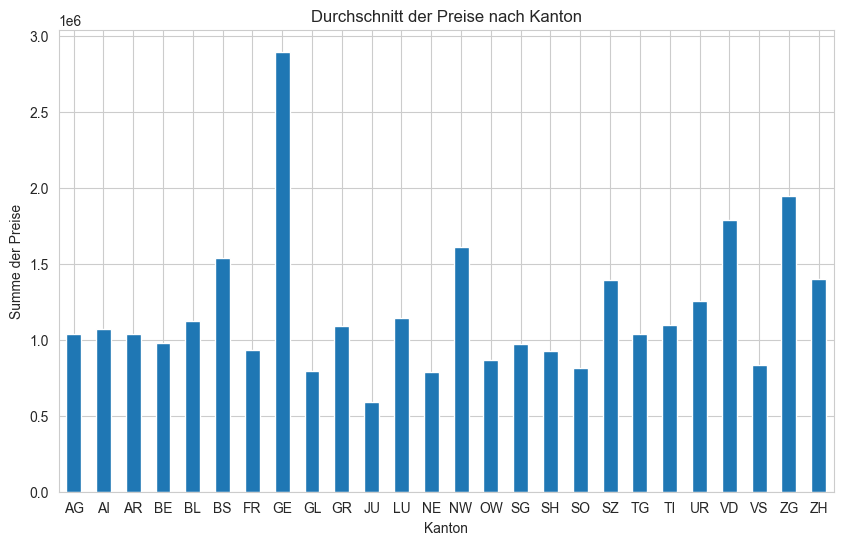

In [77]:
# Summe der Preise pro Kanton berechnen
sum_prices_by_canton = df.groupby('canton')['new_price'].mean()

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
sum_prices_by_canton.plot(kind='bar')
plt.title('Durchschnitt der Preise nach Kanton')
plt.xlabel('Kanton')
plt.ylabel('Summe der Preise')
plt.xticks(rotation=0)

# Diagramm anzeigen
plt.show()

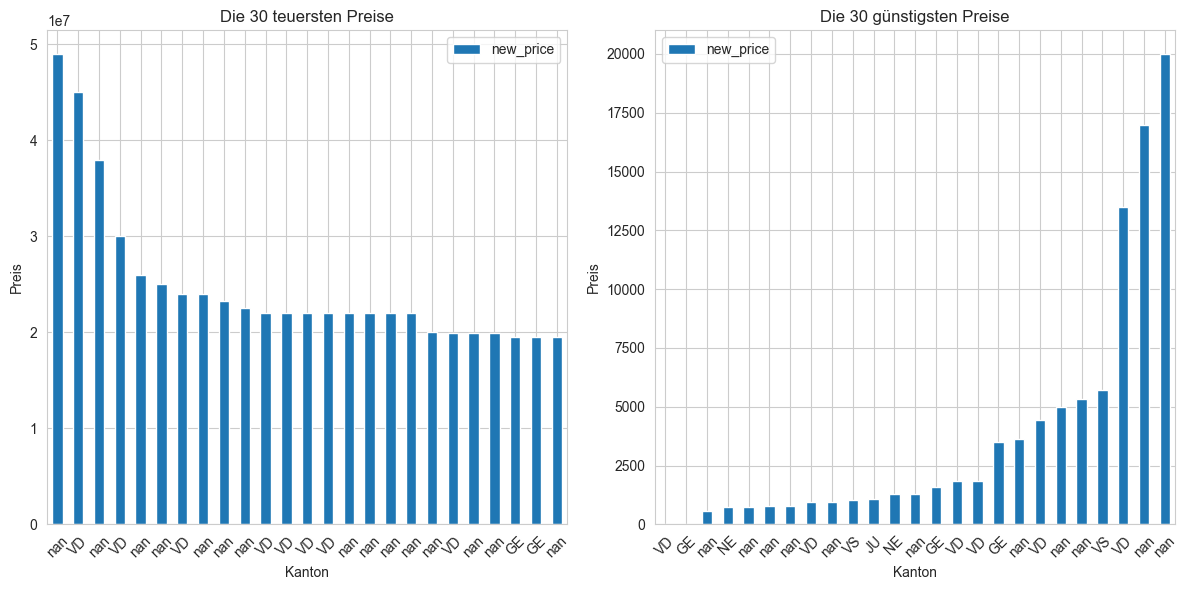

In [78]:
# Die 50 teuersten und die 50 günstigsten Preise auswählen
top_50_expensive = df.nlargest(25, 'new_price')
top_50_cheapest = df.nsmallest(25, 'new_price')

# Balkendiagramm erstellen für die 50 teuersten Preise
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_50_expensive.plot(kind='bar', x='canton', y='new_price', ax=plt.gca())
plt.title('Die 30 teuersten Preise')
plt.xlabel('Kanton')
plt.ylabel('Preis')
plt.xticks(rotation=45)

# Balkendiagramm erstellen für die 50 günstigsten Preise
plt.subplot(1, 2, 2)
top_50_cheapest.plot(kind='bar', x='canton', y='new_price', ax=plt.gca())
plt.title('Die 30 günstigsten Preise')
plt.xlabel('Kanton')
plt.ylabel('Preis')
plt.xticks(rotation=45)

# Diagramme anzeigen
plt.tight_layout()
plt.show()

In [79]:
print(type(df['new_price'][0]))
print(type(df['price_cleaned'][0]))

<class 'numpy.float32'>
<class 'numpy.float64'>


In [80]:
df

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned,canton,currency,new_price
0,Biberstein,100 m²,NaN,None,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,5023.0,NaN,NaN,NaN,NaN,AG,CHF,1150000.0
1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,5023.0,NaN,NaN,NaN,NaN,AG,CHF,1420000.0
2,Rombach,93 m²,NaN,None,Immediately,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,5022.0,NaN,NaN,NaN,NaN,AG,CHF,720000.0
3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,5023.0,NaN,NaN,NaN,NaN,AG,CHF,1430000.0
4,Rombach,142 m²,NaN,None,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,https://www.immoscout24.ch//en/d/flat-buy-romb...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,NaN,5022.0,NaN,NaN,NaN,NaN,AG,CHF,995000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,Buchs SG,102 m2,140.0,None,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",https://www.homegate.ch/buy/3002006758,NaN,...,NaN,496 m3,9470.0,NaN,NaN,NaN,102.0,NaN,CHF,475000.0
22477,Wil SG,250 m2,NaN,None,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",https://www.homegate.ch/buy/3001826476,NaN,...,3.0,NaN,9500.0,NaN,NaN,NaN,180.0,NaN,CHF,1490000.0
22478,Wil SG,240 m2,455.0,None,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",https://www.homegate.ch/buy/3001908610,NaN,...,3.0,706 m3,9500.0,NaN,NaN,NaN,167.0,NaN,CHF,1450000.0
22479,Matzingen,175 m2,NaN,None,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",https://www.homegate.ch/buy/3001883386,NaN,...,NaN,NaN,9548.0,NaN,NaN,NaN,175.0,NaN,CHF,1290000.0


In [81]:
print(type(df['Living space'][0]))

<class 'str'>


/var/folders/gj/86gf58fs3bxdc26t8vsxgltw0000gn/T/ipykernel_23555/2652021684.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['price_per_sqm'] = df['new_price'] / df['Living space']


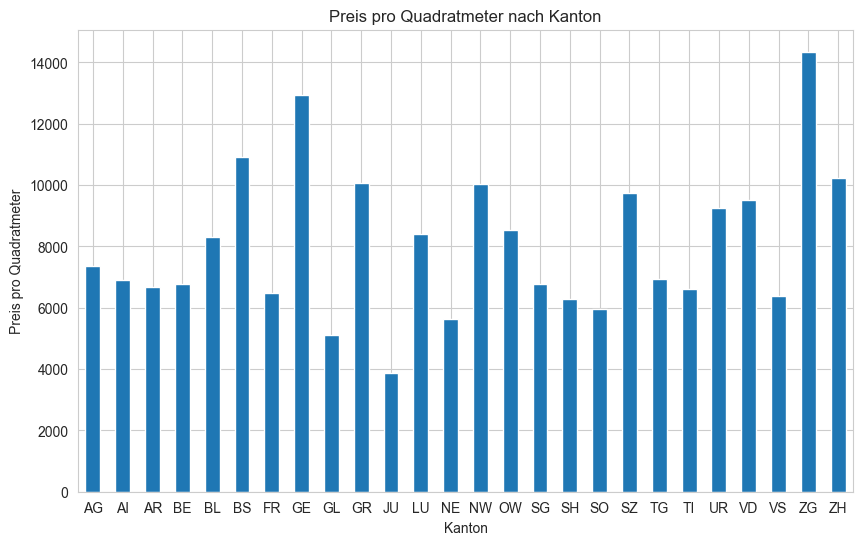

In [82]:
# 'Living space' in Quadratmeter umwandeln
df['Living space'] = df['Living space'].str.extract(r'(\d+)').astype(float)

# Preis pro Quadratmeter berechnen
df['price_per_sqm'] = df['new_price'] / df['Living space']

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
df.groupby('canton')['price_per_sqm'].mean().plot(kind='bar')
plt.title('Preis pro Quadratmeter nach Kanton')
plt.xlabel('Kanton')
plt.ylabel('Preis pro Quadratmeter')
plt.xticks(rotation=0)

# Diagramm anzeigen
plt.show()

In [83]:
availiability_counts = df['Availability'].value_counts()

In [84]:
availiability_counts

On request     9631
Immediately    2644
01.10.2022       81
01.11.2022       67
01.04.2023       55
               ... 
25.12.2022        1
16.04.2023        1
20.05.2023        1
01.04.2030        1
07.06.2023        1
Name: Availability, Length: 112, dtype: int64

In [85]:
df

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned,canton,currency,new_price,price_per_sqm
0,Biberstein,100.0,NaN,None,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,5023.0,NaN,NaN,NaN,NaN,AG,CHF,1150000.0,11500.000000
1,Biberstein,156.0,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,5023.0,NaN,NaN,NaN,NaN,AG,CHF,1420000.0,9102.564103
2,Rombach,93.0,NaN,None,Immediately,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,5022.0,NaN,NaN,NaN,NaN,AG,CHF,720000.0,7741.935484
3,Biberstein,154.0,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,5023.0,NaN,NaN,NaN,NaN,AG,CHF,1430000.0,9285.714286
4,Rombach,142.0,NaN,None,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,https://www.immoscout24.ch//en/d/flat-buy-romb...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,5022.0,NaN,NaN,NaN,NaN,AG,CHF,995000.0,7007.042254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,Buchs SG,102.0,140.0,None,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",https://www.homegate.ch/buy/3002006758,NaN,...,496 m3,9470.0,NaN,NaN,NaN,102.0,NaN,CHF,475000.0,4656.862745
22477,Wil SG,250.0,NaN,None,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",https://www.homegate.ch/buy/3001826476,NaN,...,NaN,9500.0,NaN,NaN,NaN,180.0,NaN,CHF,1490000.0,5960.000000
22478,Wil SG,240.0,455.0,None,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",https://www.homegate.ch/buy/3001908610,NaN,...,706 m3,9500.0,NaN,NaN,NaN,167.0,NaN,CHF,1450000.0,6041.666667
22479,Matzingen,175.0,NaN,None,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",https://www.homegate.ch/buy/3001883386,NaN,...,NaN,9548.0,NaN,NaN,NaN,175.0,NaN,CHF,1290000.0,7371.428571


In [86]:
print(type(df['provider'][0]))

<class 'str'>


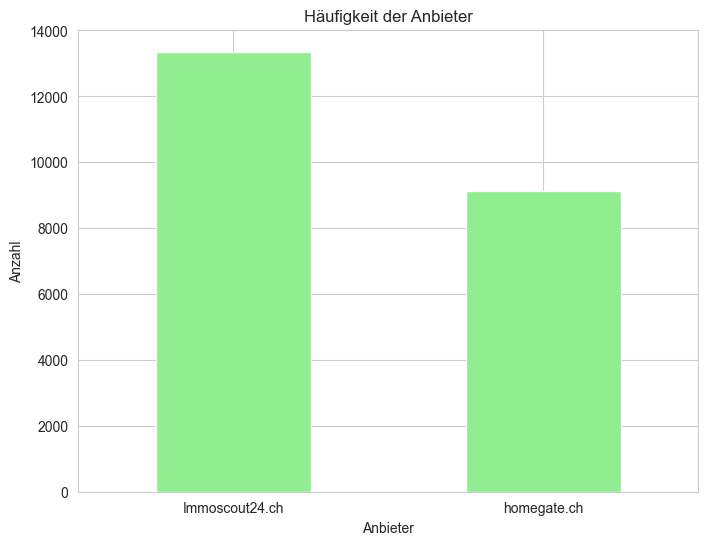

In [87]:
# Werte in der Spalte 'provider' zählen
provider_counts = df['provider'].value_counts()

# Balkendiagramm erstellen
plt.figure(figsize=(8, 6))
provider_counts.plot(kind='bar', color='lightgreen')
plt.title('Häufigkeit der Anbieter')
plt.xlabel('Anbieter')
plt.ylabel('Anzahl')
plt.xticks(rotation=0)

# Diagramm anzeigen
plt.show()

In [88]:
df['ForestDensityL'] = pd.to_numeric(df['ForestDensityL'])
df['ForestDensityM'] = pd.to_numeric(df['ForestDensityM'])
df['ForestDensityS'] = pd.to_numeric(df['ForestDensityS'])

In [89]:
df

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned,canton,currency,new_price,price_per_sqm
0,Biberstein,100.0,NaN,None,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,5023.0,NaN,NaN,NaN,NaN,AG,CHF,1150000.0,11500.000000
1,Biberstein,156.0,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,5023.0,NaN,NaN,NaN,NaN,AG,CHF,1420000.0,9102.564103
2,Rombach,93.0,NaN,None,Immediately,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,5022.0,NaN,NaN,NaN,NaN,AG,CHF,720000.0,7741.935484
3,Biberstein,154.0,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,5023.0,NaN,NaN,NaN,NaN,AG,CHF,1430000.0,9285.714286
4,Rombach,142.0,NaN,None,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,https://www.immoscout24.ch//en/d/flat-buy-romb...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,5022.0,NaN,NaN,NaN,NaN,AG,CHF,995000.0,7007.042254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,Buchs SG,102.0,140.0,None,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",https://www.homegate.ch/buy/3002006758,NaN,...,496 m3,9470.0,NaN,NaN,NaN,102.0,NaN,CHF,475000.0,4656.862745
22477,Wil SG,250.0,NaN,None,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",https://www.homegate.ch/buy/3001826476,NaN,...,NaN,9500.0,NaN,NaN,NaN,180.0,NaN,CHF,1490000.0,5960.000000
22478,Wil SG,240.0,455.0,None,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",https://www.homegate.ch/buy/3001908610,NaN,...,706 m3,9500.0,NaN,NaN,NaN,167.0,NaN,CHF,1450000.0,6041.666667
22479,Matzingen,175.0,NaN,None,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",https://www.homegate.ch/buy/3001883386,NaN,...,NaN,9548.0,NaN,NaN,NaN,175.0,NaN,CHF,1290000.0,7371.428571


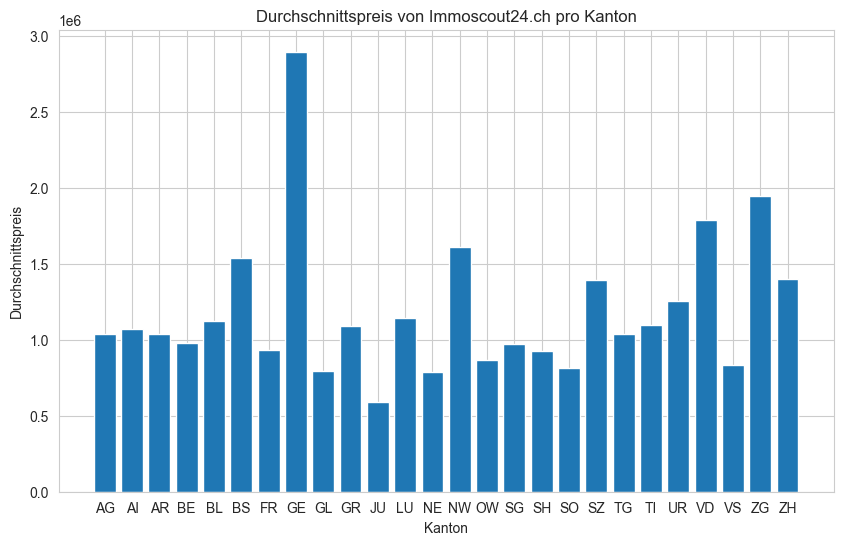

In [90]:
# Filtern nach 'provider' == 'Immoscout24.ch'
filtered_df_immo = df[df['provider'] == 'Immoscout24.ch']

# Gruppieren nach 'canton' und Durchschnittspreis berechnen
grouped_df_immo = filtered_df_immo.groupby('canton')['new_price'].mean().reset_index()

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.bar(grouped_df_immo['canton'], grouped_df_immo['new_price'])
plt.title('Durchschnittspreis von Immoscout24.ch pro Kanton')
plt.xlabel('Kanton')
plt.ylabel('Durchschnittspreis')
plt.show()

In [91]:
# Filtern Sie den DataFrame nach 'provider' == 'homegate.ch'
homegate_df = df[df['provider'] == 'homegate.ch']

# Gruppieren und den Durchschnittspreis pro Kanton berechnen
avg_prices_by_canton = homegate_df.groupby('canton')['new_price'].mean().reset_index()

# Barplot erstellen
"""plt.figure(figsize=(10, 6))
avg_prices_by_canton.plot(kind='bar', color='skyblue')
plt.title('Durchschnittspreis pro Kanton für homegate.ch')
plt.xlabel('Kanton')
plt.ylabel('Durchschnittspreis')
plt.xticks(rotation=0) """

# Den Plot anzeigen
#plt.show()

"plt.figure(figsize=(10, 6))\navg_prices_by_canton.plot(kind='bar', color='skyblue')\nplt.title('Durchschnittspreis pro Kanton für homegate.ch')\nplt.xlabel('Kanton')\nplt.ylabel('Durchschnittspreis')\nplt.xticks(rotation=0) "

In [92]:
avg_prices_by_canton

,canton,new_price


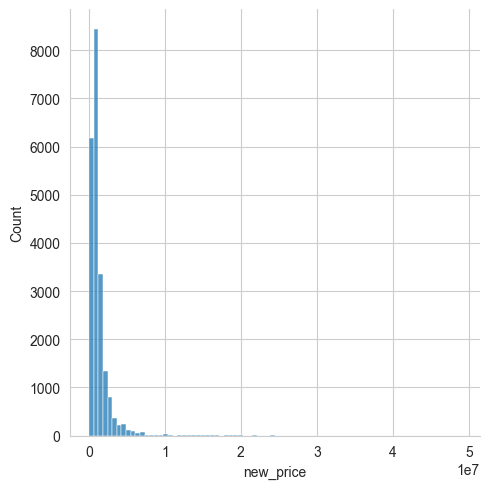

In [93]:
sns.displot(df['new_price'], bins=80)

In [94]:
df

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned,canton,currency,new_price,price_per_sqm
0,Biberstein,100.0,NaN,None,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,5023.0,NaN,NaN,NaN,NaN,AG,CHF,1150000.0,11500.000000
1,Biberstein,156.0,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,5023.0,NaN,NaN,NaN,NaN,AG,CHF,1420000.0,9102.564103
2,Rombach,93.0,NaN,None,Immediately,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,5022.0,NaN,NaN,NaN,NaN,AG,CHF,720000.0,7741.935484
3,Biberstein,154.0,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,5023.0,NaN,NaN,NaN,NaN,AG,CHF,1430000.0,9285.714286
4,Rombach,142.0,NaN,None,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,https://www.immoscout24.ch//en/d/flat-buy-romb...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,NaN,5022.0,NaN,NaN,NaN,NaN,AG,CHF,995000.0,7007.042254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,Buchs SG,102.0,140.0,None,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",https://www.homegate.ch/buy/3002006758,NaN,...,496 m3,9470.0,NaN,NaN,NaN,102.0,NaN,CHF,475000.0,4656.862745
22477,Wil SG,250.0,NaN,None,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",https://www.homegate.ch/buy/3001826476,NaN,...,NaN,9500.0,NaN,NaN,NaN,180.0,NaN,CHF,1490000.0,5960.000000
22478,Wil SG,240.0,455.0,None,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",https://www.homegate.ch/buy/3001908610,NaN,...,706 m3,9500.0,NaN,NaN,NaN,167.0,NaN,CHF,1450000.0,6041.666667
22479,Matzingen,175.0,NaN,None,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",https://www.homegate.ch/buy/3001883386,NaN,...,NaN,9548.0,NaN,NaN,NaN,175.0,NaN,CHF,1290000.0,7371.428571


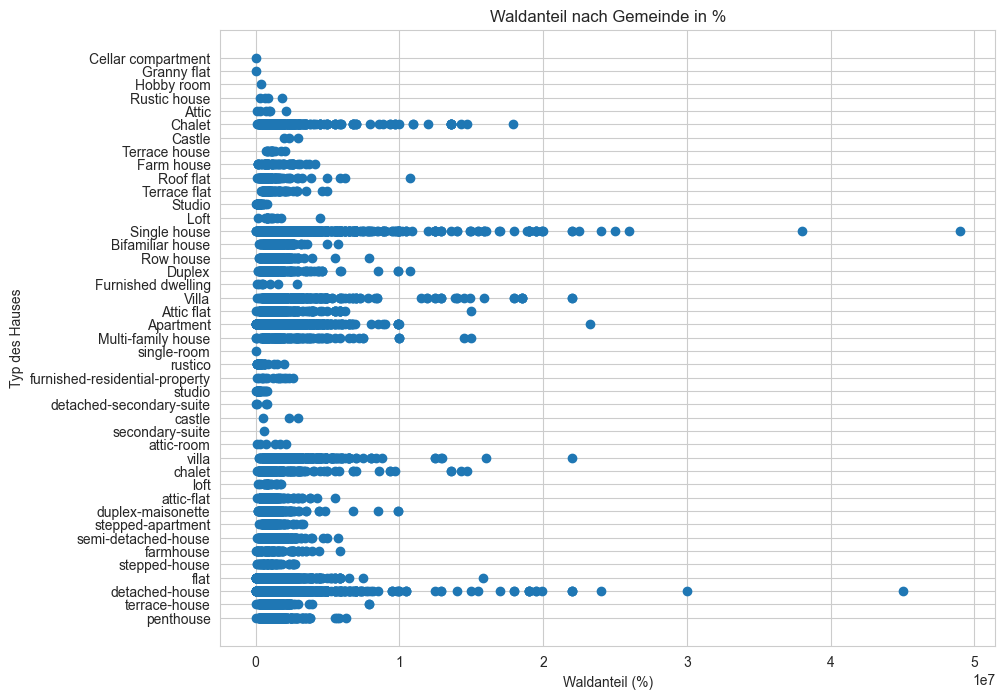

In [95]:
# Scatter Plot erstellen
plt.figure(figsize=(10, 8))
plt.scatter(df['new_price'], df['type'])
plt.title('Waldanteil nach Gemeinde in %')
plt.ylabel('Typ des Hauses')
plt.xlabel('Waldanteil (%)')
plt.grid(True)
plt.show()

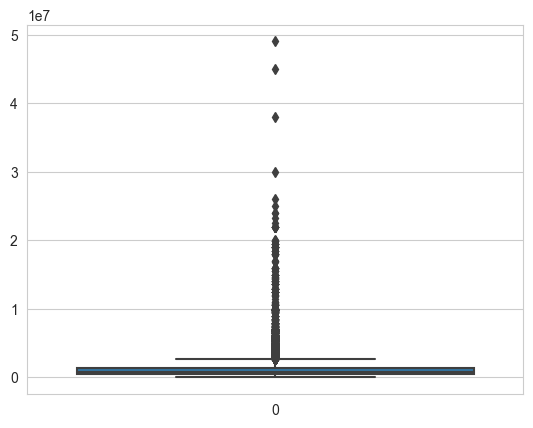

In [96]:
sns.boxplot(df['new_price'])
plt.show()

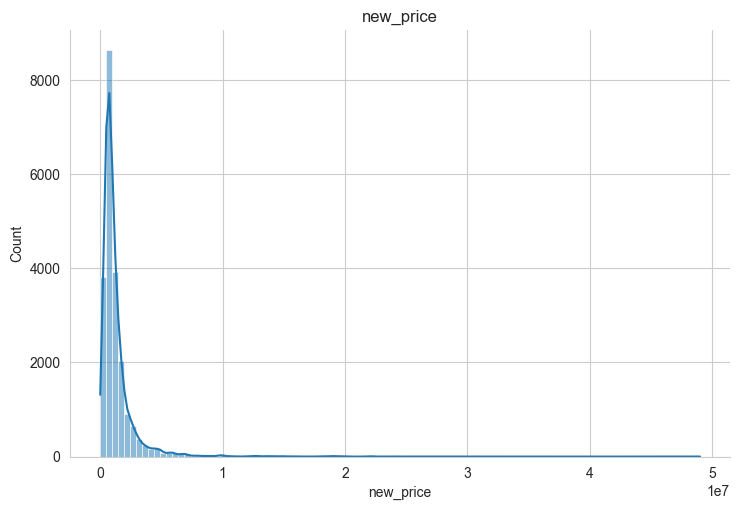

In [97]:
sns.displot(df['new_price'], kde = True, aspect = 1.5, bins = 100)
plt.title('new_price')
plt.show()

<Figure size 1000x600 with 0 Axes>

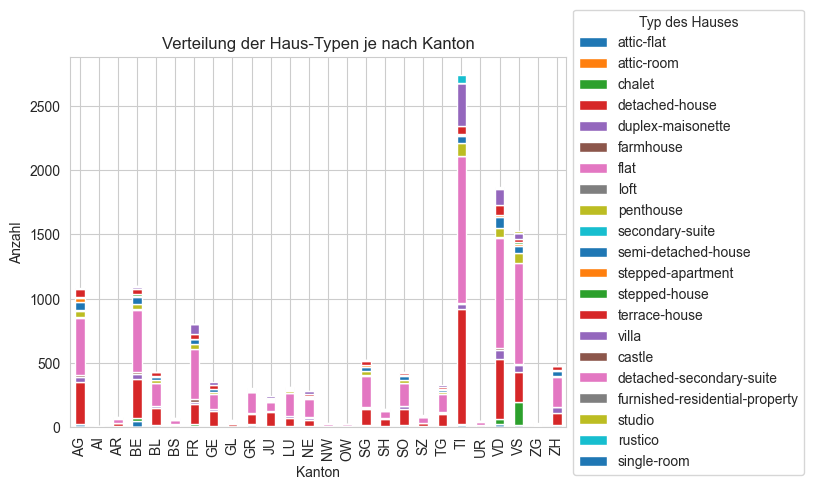

In [98]:
# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
df_grouped = df.groupby(['canton', 'type']).size().unstack()
df_grouped.plot(kind='bar', stacked=True)
plt.title('Verteilung der Haus-Typen je nach Kanton')
plt.xlabel('Kanton')
plt.ylabel('Anzahl')
plt.legend(title='Typ des Hauses', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

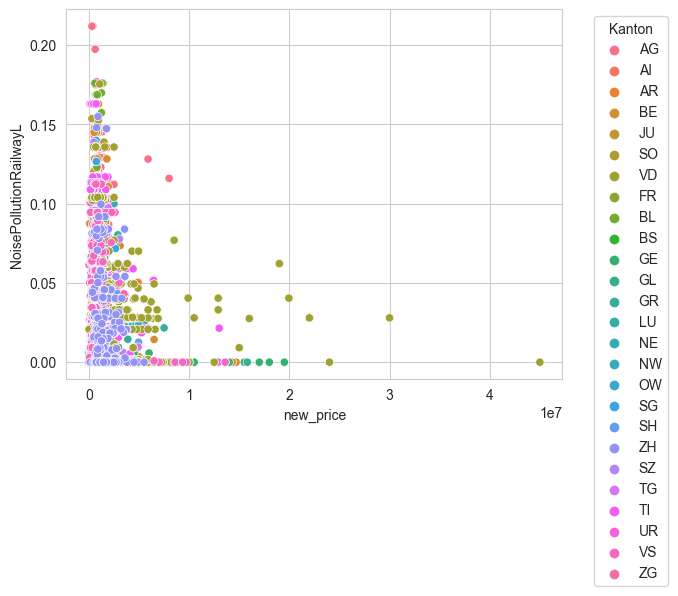

In [99]:
sns.scatterplot(data=df, x='new_price', y='NoisePollutionRailwayL', hue='canton')
# Legende neben dem Plot platzieren
plt.legend(title='Kanton', bbox_to_anchor=(1.05, 1), loc='upper left')

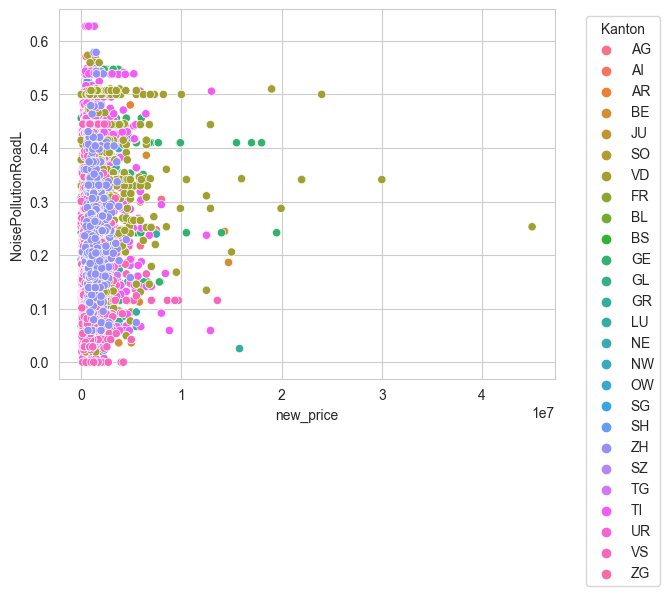

In [100]:
sns.scatterplot(data=df, x='new_price', y='NoisePollutionRoadL', hue='canton')
# Legende neben dem Plot platzieren
plt.legend(title='Kanton', bbox_to_anchor=(1.05, 1), loc='upper left')

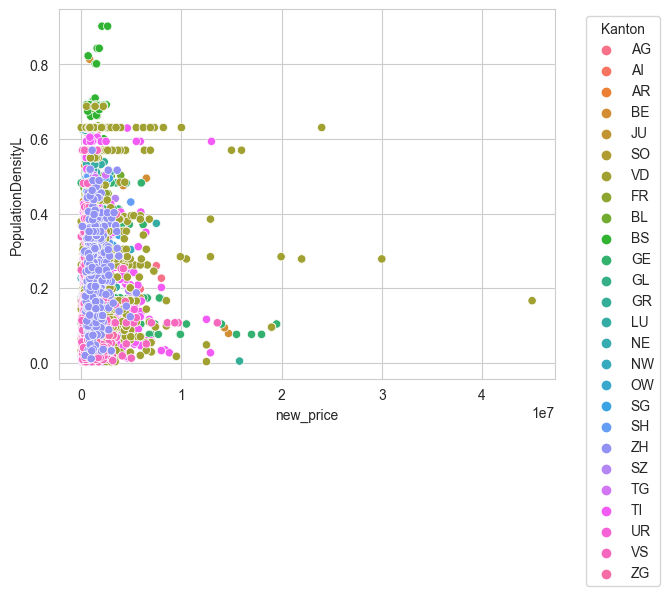

In [101]:
sns.scatterplot(data=df, x='new_price', y='PopulationDensityL', hue='canton')
# Legende neben dem Plot platzieren
plt.legend(title='Kanton', bbox_to_anchor=(1.05, 1), loc='upper left')

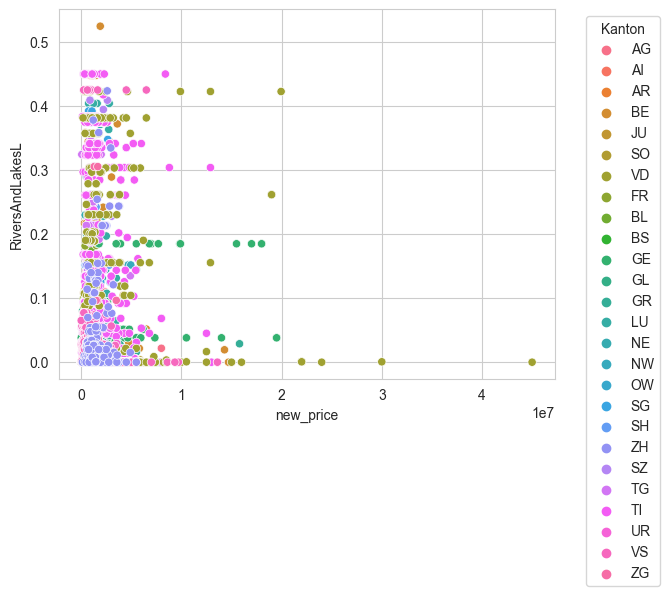

In [102]:
sns.scatterplot(data=df, x='new_price', y='RiversAndLakesL', hue='canton')
# Legende neben dem Plot platzieren
plt.legend(title='Kanton', bbox_to_anchor=(1.05, 1), loc='upper left')

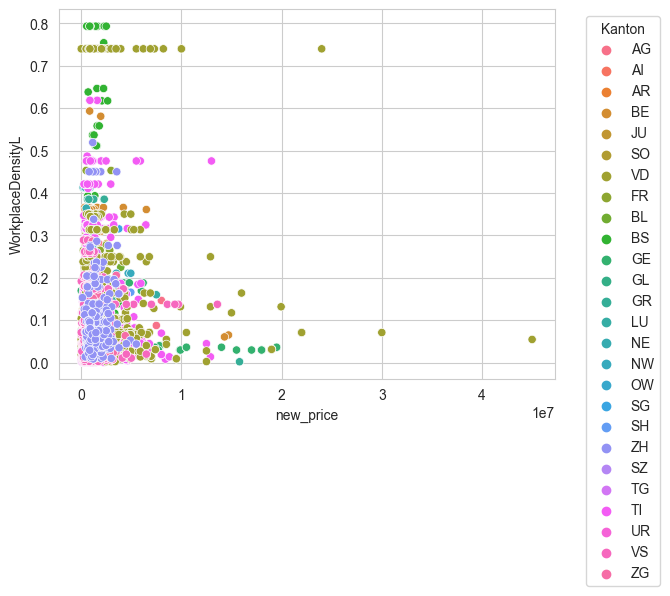

In [103]:
sns.scatterplot(data=df, x='new_price', y='WorkplaceDensityL', hue='canton')
# Legende neben dem Plot platzieren
plt.legend(title='Kanton', bbox_to_anchor=(1.05, 1), loc='upper left')

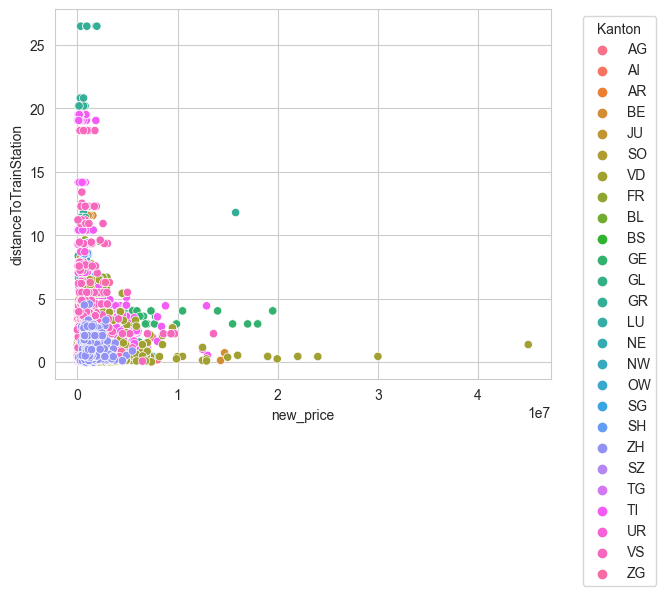

In [104]:
sns.scatterplot(data=df, x='new_price', y='distanceToTrainStation', hue='canton')
# Legende neben dem Plot platzieren
plt.legend(title='Kanton', bbox_to_anchor=(1.05, 1), loc='upper left')